# Graphviz

In [5]:
# 自動補完
%config IPCompleter.greedy=True

graph {
	a
	b [label="shape=circle
style=filled
fillcolor=pink" fillcolor=pink shape=circle style=filled]
	c [label="shape=square
color=red" color=red shape=square]
	d [label="shape=hexagon
fontcolor=red" fontcolor=red shape=hexagon]
	e [label="penwidth=5.0" penwidth=5.0]
	f [label="<f1>shape=record | {<f2.1>2.1 | <f2.2>2.2} | {<f3.1>3.1 | <f3.2>3.2 | {<f3.3.1>3.3.1 | <f3.3.2>3.3.2 | <f3.3.3>3.3.3}}" shape=record]
	a -- b
	a -- c [label="fontcolor=blue" fontcolor=blue]
	a -- d [label="color=green" color=green]
	a -- e [label="penwidth=3.0" penwidth=3.0]
	a -- f [label="style=dashed" style=dashed]
	f:f1 -- f:"f3.3.2"
}


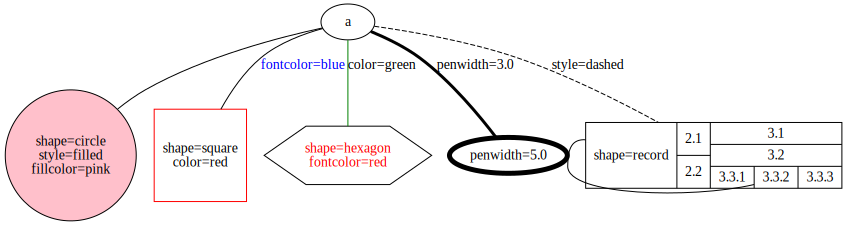

In [57]:
from graphviz import Graph

g = Graph()
g.node('a')
g.node('b', label='shape=circle\nstyle=filled\nfillcolor=pink', shape='circle', style='filled', fillcolor='pink')
g.node('c', label='shape=square\ncolor=red', shape='square', color='red')
g.node('d', label='shape=hexagon\nfontcolor=red', shape='hexagon', fontcolor='red')
g.node('e', label='penwidth=5.0', penwidth='5.0')
g.node('f', '<f1>shape=record | {<f2.1>2.1 | <f2.2>2.2} | {<f3.1>3.1 | <f3.2>3.2 | {<f3.3.1>3.3.1 | <f3.3.2>3.3.2 | <f3.3.3>3.3.3}}', shape='record')

g.edge('a', 'b')
g.edge('a', 'c', label='fontcolor=blue', fontcolor='blue')
g.edge('a', 'd', label='color=green', color='green')
g.edge('a', 'e', label='penwidth=3.0', penwidth='3.0')
g.edge('a', 'f', label='style=dashed', style='dashed')
g.edge('f:f1', 'f:f3.3.2')
print(g)
g

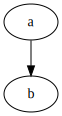

In [9]:
from graphviz import Digraph

dg = Digraph()
dg.edge('a', 'b')
dg

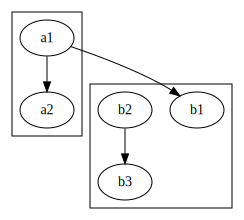

In [54]:
from graphviz import Digraph

dg = Digraph()

with dg.subgraph(name='cluster_a') as c:
    c.node('a1')
    c.node('a2')
    c.edge('a1', 'a2')
with dg.subgraph(name='cluster_b') as c:
    c.node('b1')
    c.node('b2')
    c.node('b3')
    c.edge('b2', 'b3')
dg.edge('a1', 'b1')

dg

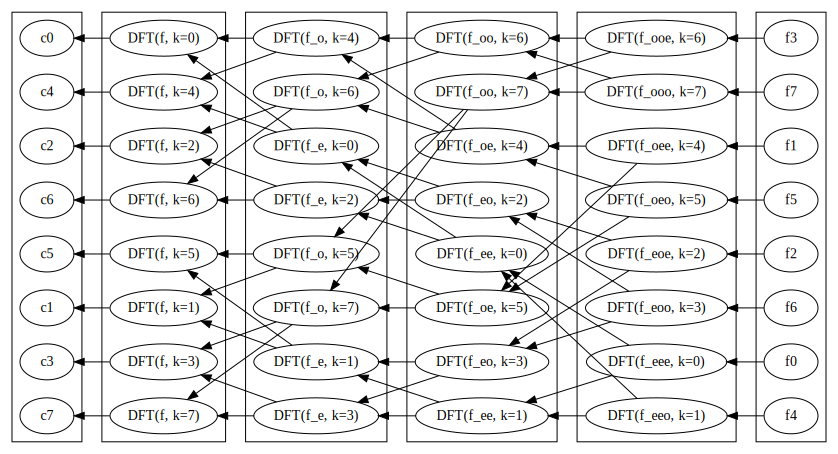

In [72]:
from graphviz import Graph
from graphviz import Digraph

dg = Digraph(format='png', engine='dot')
dg.graph_attr['rankdir'] = 'RL'
dg.graph_attr['splines'] = 'false'


N = 8

f_suffix = [''] * N

with dg.subgraph(name='cluster_c') as c:
    c.graph_attr['rankdir'] = 'TB'
    for i in range(N):
        c.node('c{}'.format(i))
    #for i in range(N-1):
    #    c.edge('c{}'.format(i), 'c{}'.format(i+1))

with dg.subgraph(name='cluster_dft8') as c:
    c.graph_attr['rankdir'] = 'TB'
    for i in range(N):
        c.node('dft8_{}'.format(i), 'DFT(f, k={})'.format(i))

with dg.subgraph(name='cluster_dft4') as c:
    c.graph_attr['rankdir'] = 'TB'
    for i in range(N):
        if i // (N/2) % 2 == 0:
            f_suffix[i] += 'e'
        else:
            f_suffix[i] += 'o'
        c.node('dft4_{}'.format(i), 'DFT(f_{}, k={})'.format(f_suffix[i], i))

with dg.subgraph(name='cluster_dft2') as c:
    c.graph_attr['rankdir'] = 'TB'
    for i in range(N):
        if i // (N/4) % 2 == 0:
            f_suffix[i] += 'e'
        else:
            f_suffix[i] += 'o'
        c.node('dft2_{}'.format(i), 'DFT(f_{}, k={})'.format(f_suffix[i], i))

with dg.subgraph(name='cluster_dft1') as c:
    c.graph_attr['rankdir'] = 'TB'
    for i in range(N):
        if i // (N/8) % 2 == 0:
            f_suffix[i] += 'e'
        else:
            f_suffix[i] += 'o'
        c.node('dft1_{}'.format(i), 'DFT(f_{}, k={})'.format(f_suffix[i], i))

f_index = [0,4,2,6,1,5,3,7]
with dg.subgraph(name='cluster_f') as c:
    c.graph_attr['rankdir'] = 'TB'
    for i in range(N):
        c.node('f{}'.format(i))

for i in range(N):
    dg.edge('dft8_{}'.format(i), 'c{}'.format(i))
    dg.edge('dft4_{}'.format(i), 'dft8_{}'.format(i))
    if i // int(N/2) % 2 == 0:
        dg.edge('dft4_{}'.format(i), 'dft8_{}'.format(i+(N//2)))
        dg.edge('dft4_{}'.format(i+(N//2)), 'dft8_{}'.format(i))
    dg.edge('dft2_{}'.format(i), 'dft4_{}'.format(i))
    if i // int(N/4) % 2 == 0:
        dg.edge('dft2_{}'.format(i), 'dft4_{}'.format(i+(N//4)))
        dg.edge('dft2_{}'.format(i+(N//4)), 'dft4_{}'.format(i))
    dg.edge('dft1_{}'.format(i), 'dft2_{}'.format(i))
    if i // int(N/8) % 2 == 0:
        dg.edge('dft1_{}'.format(i), 'dft2_{}'.format(i+(N//8)))
        dg.edge('dft1_{}'.format(i+(N//8)), 'dft2_{}'.format(i))
    dg.edge('f{}'.format(f_index[i]), 'dft1_{}'.format(i))

dg

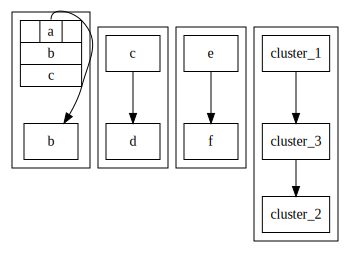

In [162]:
dg = Digraph(format='png', engine='dot')

dg.attr('node', shape='record')

dg.node('abc', '{{|<a>a|}|<b>b|<c>c}')
dg.node('b')
dg.node('c')
dg.node('d')

with dg.subgraph(name='cluster_1') as c:
    #c.graph_attr['rankdir'] = 'LR'
    c.graph_attr['rank']='same'
    c.edge('abc:a', 'b')

with dg.subgraph(name='cluster_2') as c:
    #c.graph_attr['rankdir'] = 'LR'
    #c.graph_attr['rank']='same'
    c.edge('c', 'd')

with dg.subgraph(name='cluster_3') as c:
    #c.graph_attr['rankdir'] = 'LR'
    #c.graph_attr['rank']='same'
    c.edge('e', 'f')

with dg.subgraph(name='cluster_123') as c:
    c.edge('cluster_1', 'cluster_3')
    c.edge('cluster_3', 'cluster_2')

dg

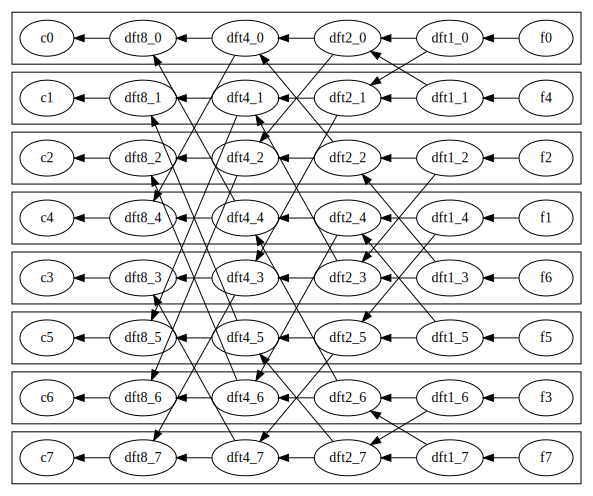

In [98]:
from graphviz import Graph
from graphviz import Digraph

dg = Digraph(format='png')
dg.graph_attr['rankdir'] = 'RL'
dg.graph_attr['splines'] = 'false'
dg.graph_attr['rank'] = 'same'

N = 8

#dg.body.append('{rank=same; ' + '; '.join(['c{}'.format(i) for i in range(N)]) + ';}')
#dg.body.append('{rank=same; ' + '; '.join(['f{}'.format(i) for i in range(N)]) + ';}')

f_suffix = [''] * N

f_index = [0,4,2,6,1,5,3,7]

for i in range(N):
    with dg.subgraph(name='cluster_{}'.format(i)) as sg:
        sg.graph_attr['rank'] = 'same'
        sg.node('c{}'.format(i))
        sg.node('dft8_{}'.format(i))
        sg.node('dft4_{}'.format(i))
        sg.node('dft2_{}'.format(i))
        sg.node('dft1_{}'.format(i))
        sg.node('f{}'.format(f_index[i]))
        sg.edge('dft8_{}'.format(i), 'c{}'.format(i))
        sg.edge('dft4_{}'.format(i), 'dft8_{}'.format(i))
        sg.edge('dft2_{}'.format(i), 'dft4_{}'.format(i))
        sg.edge('dft1_{}'.format(i), 'dft2_{}'.format(i))
        sg.edge('f{}'.format(f_index[i]), 'dft1_{}'.format(i))

for i in range(N):
    if i // int(N/8) % 2 == 0:
        dg.edge('dft1_{}'.format(i), 'dft2_{}'.format(i+(N//8)), constraint='false')
        dg.edge('dft1_{}'.format(i+(N//8)), 'dft2_{}'.format(i), constraint='false')
    if i // int(N/4) % 2 == 0:
        dg.edge('dft2_{}'.format(i), 'dft4_{}'.format(i+(N//4)), constraint='false')
        dg.edge('dft2_{}'.format(i+(N//4)), 'dft4_{}'.format(i), constraint='false')
    if i // int(N/2) % 2 == 0:
        dg.edge('dft4_{}'.format(i), 'dft8_{}'.format(i+(N//2)), constraint='false')
        dg.edge('dft4_{}'.format(i+(N//2)), 'dft8_{}'.format(i), constraint='false')

"""
for i in range(N-1):
    dg.edge('c{}'.format(i), 'c{}'.format(i+1), constraint='false')
    dg.edge('dft1_{}'.format(i), 'dft1_{}'.format(i+1), constraint='false')
    dg.edge('dft2_{}'.format(i), 'dft2_{}'.format(i+1), constraint='false')
    dg.edge('dft4_{}'.format(i), 'dft4_{}'.format(i+1), constraint='false')
    dg.edge('dft8_{}'.format(i), 'dft8_{}'.format(i+1), constraint='false')
    dg.edge('f{}'.format(f_index[i]), 'f{}'.format(f_index[i+1]), constraint='false')
"""

#for i in range(N):
#    for j in range(N):
#        if i-j != 4 and j-i != 4:
#            dg.edge('dft4_{}'.format(i), 'dft8_{}'.format(j))

"""
with dg.subgraph(name='cluster_c') as c:
    #c.graph_attr['rankdir'] = 'TB'
    for i in range(N):
        c.node('c{}'.format(i))
    #for i in range(N-1):
    #    c.edge('c{}'.format(i), 'c{}'.format(i+1))

with dg.subgraph(name='cluster_dft8') as c:
    #c.graph_attr['rankdir'] = 'TB'
    for i in range(N):
        c.node('dft8_{}'.format(i), 'DFT(f, k={})'.format(i))

with dg.subgraph(name='cluster_dft4') as c:
    #c.graph_attr['rankdir'] = 'TB'
    for i in range(N):
        if i // (N/2) % 2 == 0:
            f_suffix[i] += 'e'
        else:
            f_suffix[i] += 'o'
        c.node('dft4_{}'.format(i), 'DFT(f_{}, k={})'.format(f_suffix[i], i))

with dg.subgraph(name='cluster_dft2') as c:
    #c.graph_attr['rankdir'] = 'TB'
    for i in range(N):
        if i // (N/4) % 2 == 0:
            f_suffix[i] += 'e'
        else:
            f_suffix[i] += 'o'
        c.node('dft2_{}'.format(i), 'DFT(f_{}, k={})'.format(f_suffix[i], i))

with dg.subgraph(name='cluster_dft1') as c:
    #c.graph_attr['rankdir'] = 'TB'
    for i in range(N):
        if i // (N/8) % 2 == 0:
            f_suffix[i] += 'e'
        else:
            f_suffix[i] += 'o'
        c.node('dft1_{}'.format(i), 'DFT(f_{}, k={})'.format(f_suffix[i], i))

f_index = [0,4,2,6,1,5,3,7]
with dg.subgraph(name='cluster_f') as c:
    #c.graph_attr['rankdir'] = 'TB'
    for i in range(N):
        c.node('f{}'.format(i))

for i in range(N):
    dg.edge('dft8_{}'.format(i), 'c{}'.format(i))
    dg.edge('dft4_{}'.format(i), 'dft8_{}'.format(i))
    if i // int(N/2) % 2 == 0:
        dg.edge('dft4_{}'.format(i), 'dft8_{}'.format(i+(N//2)))
        dg.edge('dft4_{}'.format(i+(N//2)), 'dft8_{}'.format(i))
    dg.edge('dft2_{}'.format(i), 'dft4_{}'.format(i))
    if i // int(N/4) % 2 == 0:
        dg.edge('dft2_{}'.format(i), 'dft4_{}'.format(i+(N//4)))
        dg.edge('dft2_{}'.format(i+(N//4)), 'dft4_{}'.format(i))
    dg.edge('dft1_{}'.format(i), 'dft2_{}'.format(i))
    if i // int(N/8) % 2 == 0:
        dg.edge('dft1_{}'.format(i), 'dft2_{}'.format(i+(N//8)))
        dg.edge('dft1_{}'.format(i+(N//8)), 'dft2_{}'.format(i))
    dg.edge('f{}'.format(f_index[i]), 'dft1_{}'.format(i))
"""

dg

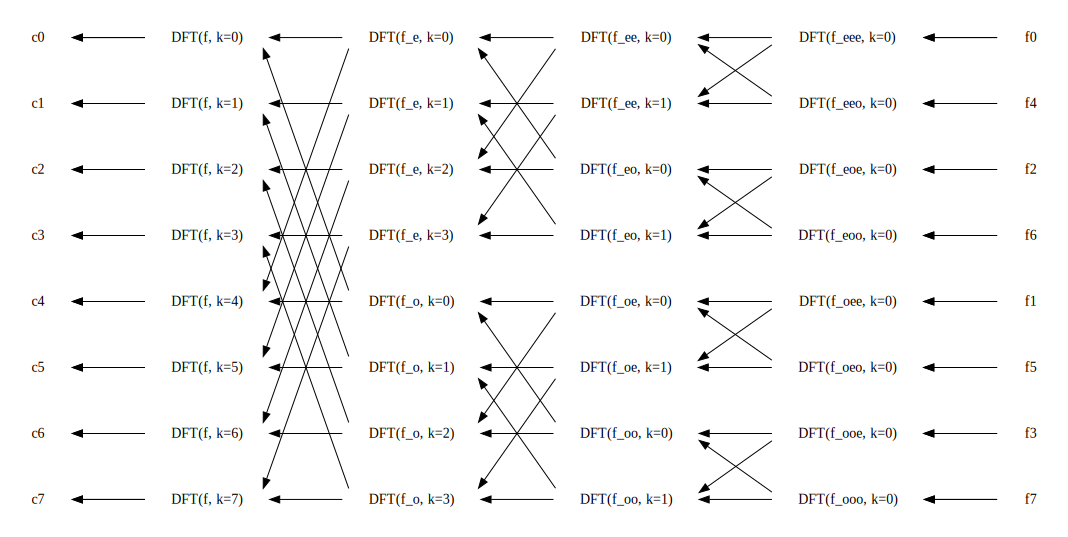

In [178]:
dg = Digraph(format='png', engine='dot')

dg.graph_attr['rankdir'] = 'RL'
dg.graph_attr['splines'] = 'false'
#dg.graph_attr['rank'] = 'same'
#dg.attr('node', shape='record', height='4')
dg.attr('node', shape='record', height='3', style='setlinewidth(0)')
dg.attr('edge', minlen='2')


#dg.node('abc', '{<a>a|<b>b|<c>c}')



N = 8

#dg.body.append('{rank=same; ' + '; '.join(['c{}'.format(i) for i in range(N)]) + ';}')
#dg.body.append('{rank=same; ' + '; '.join(['f{}'.format(i) for i in range(N)]) + ';}')

f_suffix = [''] * N

def l_dft8(i):
    return 'DFT(f, k={})'.format(i)

def l_dft4(i):
    if i // (N/2) % 2 == 0:
        f_suffix[i] += 'e'
    else:
        f_suffix[i] += 'o'
    return 'DFT(f_{}, k={})'.format(f_suffix[i], i % (N//2))

def l_dft2(i):
    if i // (N/4) % 2 == 0:
        f_suffix[i] += 'e'
    else:
        f_suffix[i] += 'o'
    return 'DFT(f_{}, k={})'.format(f_suffix[i], i % (N//4))

def l_dft1(i):
    if i // (N/8) % 2 == 0:
        f_suffix[i] += 'e'
    else:
        f_suffix[i] += 'o'
    return 'DFT(f_{}, k={})'.format(f_suffix[i], i % (N//8))

f_index = [0,4,2,6,1,5,3,7]

dg.node('c', '|'.join([ '{{{{|<{x}l>|}} | c{x} | {{|<{x}r>|}}}}'.format(x=i) for i in range(N)]))
dg.node('dft8', '|'.join([ '{{{{|<{x}l>|}} | {label} | {{|<{x}r>|}}}}'.format(x=i, label=l_dft8(i)) for i in range(N)]))
dg.node('dft4', '|'.join([ '{{{{|<{x}l>|}} | {label} | {{|<{x}r>|}}}}'.format(x=i, label=l_dft4(i)) for i in range(N)]))
dg.node('dft2', '|'.join([ '{{{{|<{x}l>|}} | {label} | {{|<{x}r>|}}}}'.format(x=i, label=l_dft2(i)) for i in range(N)]))
dg.node('dft1', '|'.join([ '{{{{|<{x}l>|}} | {label} | {{|<{x}r>|}}}}'.format(x=i, label=l_dft1(i)) for i in range(N)]))
#dg.node('dft4', '|'.join([ '{{{{|<{x}l>|}} | dft4{x} | {{|<{x}r>|}}}}'.format(x=i) for i in range(N)]))
#dg.node('dft2', '|'.join([ '{{{{|<{x}l>|}} | dft2{x} | {{|<{x}r>|}}}}'.format(x=i) for i in range(N)]))
#dg.node('dft1', '|'.join([ '{{{{|<{x}l>|}} | dft1{x} | {{|<{x}r>|}}}}'.format(x=i) for i in range(N)]))
dg.node('f', '|'.join([ '{{{{|<{x}l>|}} | f{x} | {{|<{x}r>|}}}}'.format(x=f_index[i]) for i in range(N)]))


#dg.edge('c:1', 'f:3')
#dg.edge('c:1', 'dft1:3')
#dg.edge('c:1', 'dft1:7')

for i in range(N):
    dg.edge('dft8:{}l'.format(i), 'c:{}r'.format(i))
    dg.edge('dft4:{}l'.format(i), 'dft8:{}r'.format(i))
    dg.edge('dft2:{}l'.format(i), 'dft4:{}r'.format(i))
    dg.edge('dft1:{}l'.format(i), 'dft2:{}r'.format(i))
    dg.edge('f:{}l'.format(f_index[i]), 'dft1:{}r'.format(i))
    """
    with dg.subgraph(name='cluster_{}'.format(i)) as sg:
        sg.graph_attr['rank'] = 'same'
        sg.node('c{}'.format(i))
        sg.node('dft8_{}'.format(i))
        sg.node('dft4_{}'.format(i))
        sg.node('dft2_{}'.format(i))
        sg.node('dft1_{}'.format(i))
        sg.node('f{}'.format(f_index[i]))
        sg.edge('dft8_{}'.format(i), 'c{}'.format(i))
        sg.edge('dft4_{}'.format(i), 'dft8_{}'.format(i))
        sg.edge('dft2_{}'.format(i), 'dft4_{}'.format(i))
        sg.edge('dft1_{}'.format(i), 'dft2_{}'.format(i))
        sg.edge('f{}'.format(f_index[i]), 'dft1_{}'.format(i))
    """

for i in range(N):
    dg.edge('dft8:{}l'.format(i), 'c:{}r'.format(i))
    if i // int(N/8) % 2 == 0:
        dg.edge('dft1:{}l'.format(i), 'dft2:{}r'.format(i+(N//8)), constraint='false')
        dg.edge('dft1:{}l'.format(i+(N//8)), 'dft2:{}r'.format(i), constraint='false')
    if i // int(N/4) % 2 == 0:
        dg.edge('dft2:{}l'.format(i), 'dft4:{}r'.format(i+(N//4)), constraint='false')
        dg.edge('dft2:{}l'.format(i+(N//4)), 'dft4:{}r'.format(i), constraint='false')
    if i // int(N/2) % 2 == 0:
        dg.edge('dft4:{}l'.format(i), 'dft8:{}r'.format(i+(N//2)), constraint='false')
        dg.edge('dft4:{}l'.format(i+(N//2)), 'dft8:{}r'.format(i), constraint='false')
    dg.edge('f:{}l'.format(f_index[i]), 'dft1:{}r'.format(i))

dg.render('fft_butterfly')
dg